In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("user_events.csv")

In [3]:
print(df.head())

   user_id    event_type           event_time   device    city
0        1  message_sent  2024-11-01 09:12:10  android  Tehran
1        2  message_sent  2024-11-01 09:14:22  android  Shiraz
2        1  message_sent  2024-11-01 21:45:03  android  Tehran
3        3         login  2024-11-02 08:05:44      ios  Tehran
4        2  message_sent  2024-11-02 22:10:01  android  Shiraz


In [4]:
df = pd.read_csv("user_events.csv")

df["event_time"] = pd.to_datetime(df["event_time"])

print(df.dtypes)

user_id                int64
event_type            object
event_time    datetime64[ns]
device                object
city                  object
dtype: object


In [5]:
print(df.head())
print(df["event_time"].dt.hour)


   user_id    event_type          event_time   device    city
0        1  message_sent 2024-11-01 09:12:10  android  Tehran
1        2  message_sent 2024-11-01 09:14:22  android  Shiraz
2        1  message_sent 2024-11-01 21:45:03  android  Tehran
3        3         login 2024-11-02 08:05:44      ios  Tehran
4        2  message_sent 2024-11-02 22:10:01  android  Shiraz
0     9
1     9
2    21
3     8
4    22
5    10
6    23
7     0
8    12
9    18
Name: event_time, dtype: int32


In [6]:
df = df.sort_values(by="event_time", ascending=False)


In [7]:
df = df.sort_values(by="event_time").reset_index(drop=True)
print(df.head())

   user_id    event_type          event_time   device    city
0        1  message_sent 2024-11-01 09:12:10  android  Tehran
1        2  message_sent 2024-11-01 09:14:22  android  Shiraz
2        1  message_sent 2024-11-01 21:45:03  android  Tehran
3        3         login 2024-11-02 08:05:44      ios  Tehran
4        2  message_sent 2024-11-02 22:10:01  android  Shiraz


In [8]:
print(df.head())
print(df.tail())


   user_id    event_type          event_time   device    city
0        1  message_sent 2024-11-01 09:12:10  android  Tehran
1        2  message_sent 2024-11-01 09:14:22  android  Shiraz
2        1  message_sent 2024-11-01 21:45:03  android  Tehran
3        3         login 2024-11-02 08:05:44      ios  Tehran
4        2  message_sent 2024-11-02 22:10:01  android  Shiraz
   user_id    event_type          event_time   device     city
5        4         login 2024-11-03 10:00:00  android   Tabriz
6        1  message_sent 2024-11-03 23:59:59  android   Tehran
7        3  message_sent 2024-11-04 00:10:10      ios   Tehran
8        5         login 2024-11-04 12:30:00      ios  Mashhad
9        2  message_sent 2024-11-05 18:45:20  android   Shiraz


In [9]:
print(df)


   user_id    event_type          event_time   device     city
0        1  message_sent 2024-11-01 09:12:10  android   Tehran
1        2  message_sent 2024-11-01 09:14:22  android   Shiraz
2        1  message_sent 2024-11-01 21:45:03  android   Tehran
3        3         login 2024-11-02 08:05:44      ios   Tehran
4        2  message_sent 2024-11-02 22:10:01  android   Shiraz
5        4         login 2024-11-03 10:00:00  android   Tabriz
6        1  message_sent 2024-11-03 23:59:59  android   Tehran
7        3  message_sent 2024-11-04 00:10:10      ios   Tehran
8        5         login 2024-11-04 12:30:00      ios  Mashhad
9        2  message_sent 2024-11-05 18:45:20  android   Shiraz


In [10]:
event_counts = df["event_type"].value_counts()
print(event_counts)


event_type
message_sent    7
login           3
Name: count, dtype: int64


In [11]:
event_counts = df.groupby("event_type").size()
print(event_counts)


event_type
login           3
message_sent    7
dtype: int64


In [12]:
# counting uniqe IDs
unique_users = df["user_id"].nunique()
print("Unique users:", unique_users)


Unique users: 5


In [13]:
user_activity = df.groupby("user_id").size().sort_values(ascending=False)
print(user_activity)


user_id
1    3
2    3
3    2
4    1
5    1
dtype: int64


In [14]:
df["hour"] = df["event_time"].dt.hour

hourly_activity = df.groupby("hour").size()
print(hourly_activity)


hour
0     1
8     1
9     2
10    1
12    1
18    1
21    1
22    1
23    1
dtype: int64


In [15]:
active_users = df.groupby("user_id").size()
active_users = active_users[active_users >= 2]

print(active_users)
print("Number of active users:", active_users.count())


user_id
1    3
2    3
3    2
dtype: int64
Number of active users: 3


In [16]:
active_user_ids = active_users.index
active_events = df[df["user_id"].isin(active_user_ids)]

print("Active users contribution:", len(active_events) / len(df))


Active users contribution: 0.8


In [17]:
df["hour"] = df["event_time"].dt.hour
hourly_activity = df.groupby("hour").size().sort_index()

print(hourly_activity)


hour
0     1
8     1
9     2
10    1
12    1
18    1
21    1
22    1
23    1
dtype: int64


In [18]:
print(df["hour"])

0     9
1     9
2    21
3     8
4    22
5    10
6    23
7     0
8    12
9    18
Name: hour, dtype: int32


In [19]:
df["date"] = df["event_time"].dt.date

daily_activity = df.groupby("date").size()

print(daily_activity)


date
2024-11-01    3
2024-11-02    2
2024-11-03    2
2024-11-04    2
2024-11-05    1
dtype: int64


In [20]:
peak_hour = hourly_activity.idxmax()
print("Peak hour:", peak_hour)


Peak hour: 9


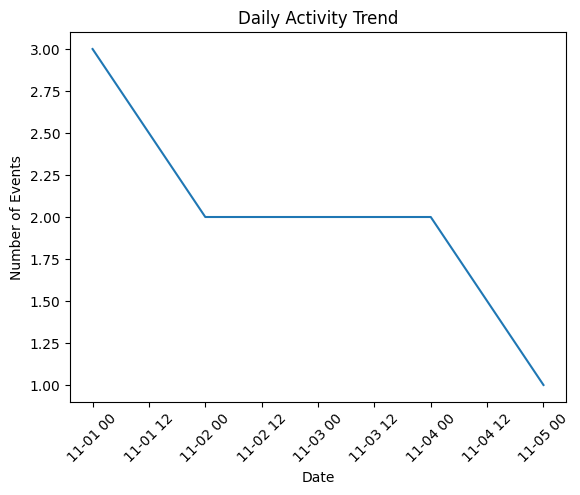

In [21]:
import matplotlib.pyplot as plt

daily_activity.plot(kind="line")
plt.title("Daily Activity Trend")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


In [22]:
device_activity = df.groupby("device").size()
print(device_activity)


device
android    7
ios        3
dtype: int64


In [23]:
device_hourly = df.groupby(["device", "hour"]).size()
print(device_hourly)


device   hour
android  9       2
         10      1
         18      1
         21      1
         22      1
         23      1
ios      0       1
         8       1
         12      1
dtype: int64
